<a href="https://colab.research.google.com/github/lavillegas/Python_ML_UdeA/blob/main/sesion12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 12**

## **Contenido**

- <a href="#reg"> Aprendizaje supervisado: Regresión lineal</a><br>
- <a href="#skl"> Introducción a Sklearn</a><br>


# **Aprendizaje supervisado: Regresión**

En el aprendizaje supervisado, los datos de entrada con los que alimentamos el algoritmo incluyen las soluciones deseadas, conocidas como *etiquetas*. Una tarea típica es la de la **regresión**, donde las etiquetas tienen una naturaleza continua.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Recordemos entonces que hay 2 posibles tareas para el aprendizaje supervisado según la naturaleza de la variable objetivo. 

In [ ]:
corr = [f'Correo {i}' for i in range(1,6)]
sp = np.random.randint(2,size=5)
df1 = pd.DataFrame({'Correo': corr, 'Spam': sp})
df1

,Correo,Spam
0,Correo 1,1
1,Correo 2,0
2,Correo 3,1
3,Correo 4,1
4,Correo 5,0


In [ ]:
n = 10
tam = np.linspace(2, 10, n)
precio = tam * 1000 + 500*np.random.randn(n)
df2 = pd.DataFrame({'Tamaño_Motor': tam, 'Precio': precio})
df2

,Tamaño_Motor,Precio
0,2.000000,1765.802126
1,2.888889,2178.641106
2,3.777778,3896.950336
3,4.666667,4108.622261
4,5.555556,5740.087172
5,6.444444,6289.439264
6,7.333333,7599.062753
7,8.222222,8867.608159
8,9.111111,9344.807546
9,10.000000,9912.465493


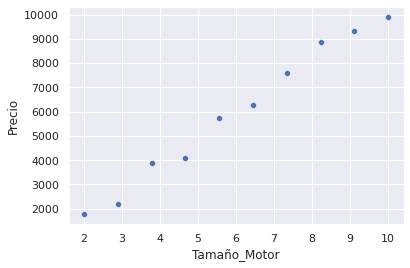

In [ ]:
sns.scatterplot(data = df2, x = "Tamaño_Motor", y = "Precio");

Consideremos el siguiente problema: Predecir las emisiones de CO2 dado el siguiente conjunto de datos.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Note que este es un problema de **aprendizaje supervisado**: Los datos de entrada incluyen las *etiquetas*. Como la variable a predecir es una etiqueta continua, entonces la tarea es de regresión.

Para resolver el problema podemos construir un modelo lineal simple. ¿Cómo construir el modelo? Cuando hablamos de modelo, normalmente nos referimos a alguna expresión matemática o a un conjunto de ecuaciones. En el caso de la regresión lineal, el modelo es una función lineal de las características predictoras $X$








$$\hat{y}(X) = w_0 + w_1 x_1 + \cdots + w_n x_n = W^T \cdot X $$


Donde $$W =
 \begin{pmatrix}
  w_0 \\
  w_1 \\
  \vdots \\
  w_n
 \end{pmatrix}$$ son los parámetros del modelo. De manera más general, un modelo lineal hace una predicción calculando una suma pesada de las características de entrada, más una constante conocida como el término de sesgo $w_0$.

Para simplificar el problema, utilicemos una única característica predictora:

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

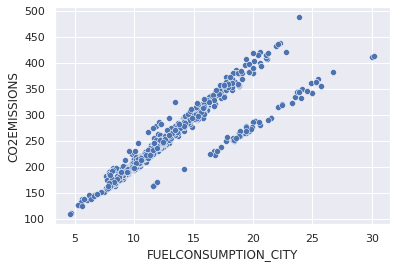

In [ ]:
sns.scatterplot(x ='FUELCONSUMPTION_CITY', y = 'CO2EMISSIONS',data = df);

En este caso el modelo toma la forma

$$\hat{y}(x_1) = w_0 + w_1 x_1$$

¿Cómo elegir los valores de $W$ de tal manera que obtengamos el mejor modelo posible?

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/U3GzGtz.png" align="center" hspace="10px" vspace="0px"></p> 

**Estadística clásica:**

En el caso de la estadística clásica, lo que se hace es minimizar el error cuadrático medio (MSE)


$$MSE =\frac{1}{n}\sum_{i=0}^{n} \left(y_i-\hat{y}\right)^2$$

donde $y_i$ son los valores observados y $n$ el número de instancias. El proceso de optimización (minimización) tiene una solución cerrada conocida como la ecuación normal:

$$W=(X^{T}\cdot X)^{-1}\cdot X^{T}\cdot y$$



**ML**

En el ML, se realiza un proceso similar, donde la función a minimizar (en este caso el MSE) se conoce generalmente como **función de costo/pérdida**

$$L =\frac{1}{n}\sum_{i=0}^{n} \left[y_i-\hat{y}\right]^2$$

Y el proceso de optimización que permite encontrar los parámetros $W$ que minimicen la función de costo/pérdida se conoce como *entrenamiento* del modelo.

¿Cuál es entonces la diferencia entre ambas aproximaciones al problema? 

La principal diferencia entre el ML y la estadística clásica es su propósito y la forma en que evaluamos los modelos.

Respecto al propósito, podemos decir que los modelos de ML están diseñados para realizar las predicciones más precisas posibles: Una vez los modelos "aprendan" los parámetros $W$, pueden ser utilizados para estimar valores de $y$ dados nuevos valores de $X$.

Los modelos estadísticos están diseñados para realizar inferencias sobre las relaciones entre las variables.



**Machine Learning (ML): Terminología**

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Veamos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.

La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

Vemos que en el caso del ML hacemos algo llamado *entrenar* el modelo, que implica usar un subconjunto de nuestros datos, y no sabemos qué tan bien funcionará el modelo hasta que 'probamos' estos datos en datos adicionales que no estaban presentes durante el entrenamiento, llamado *conjunto de prueba*. **El propósito del ML, en este caso, es obtener el mejor rendimiento posible en el conjunto de prueba.**

Para el modelo estadístico, encontramos una línea que minimiza el error cuadrático. No es necesario ningún conjunto de entrenamiento ni de prueba. Para muchos casos, el objetivo de nuestro modelo es caracterizar la relación entre los datos y nuestra variable objetivo, no hacer predicciones sobre datos futuros. A este procedimiento lo llamamos *inferencia estadística*, en oposición a predicción. Sin embargo, todavía podemos usar este modelo para hacer predicciones, y este puede ser su propósito principal, pero la forma en que se evalúa el modelo no implicará un conjunto de prueba y, en cambio, implicará evaluar la significancia y la robustes de los parámetros del modelo.

Debe quedar claro que estos dos enfoques son diferentes en su objetivo, a pesar de utilizar medios similares. La evaluación del algoritmo de ML utiliza un conjunto de prueba para validar su precisión. Mientras que, para un modelo estadístico, el análisis de los parámetros de la regresión se hace a través de intervalos de confianza, pruebas de significancia y demás pruebas estadísticas que permitan evaluar la calidad del modelo. Dado que estos métodos producen el mismo resultado, es fácil ver por qué se podría suponer que son iguales.

**Ejercicio**

Usar la ecuacion 
\begin{equation}
W = (X^T\cdot X)^{-1} \cdot X^T \cdot y
\end{equation}
para hallar los pesos $W$


In [ ]:
y = df.CO2EMISSIONS
#X = np.vstack((np.ones(df.shape[0]),np.array(df.FUELCONSUMPTION_CITY))).T
X = np.c_[np.ones(df.shape[0]),np.array(df.FUELCONSUMPTION_CITY)]

###**NOTACIÓN**
Si el modelo tiene una sola característica entonces mi variable objetivo la llamaremos $y$ i.e.

$$y(x) = \alpha_0+\alpha_1x_1$$

Si el modelo tiene dos características, entonces mi variable objetivo la llamaremos $z$ i.e.

$$z(x) = \alpha_0+\alpha_1x_1+\alpha_2x_2$$

\begin{equation}
W = (X^T\cdot X)^{-1} \cdot X^T \cdot y
\end{equation}

In [ ]:
W = np.linalg.inv(X.T @ X) @ X.T @ y 

In [ ]:
W

array([71.7202284 , 13.87643376])

In [ ]:
w0 = W[0]
w1 = W[1]

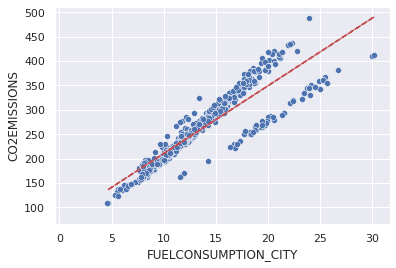

In [ ]:
sns.scatterplot(x ='FUELCONSUMPTION_CITY', y = 'CO2EMISSIONS',data = df)
plt.plot(X, w0 + w1 * X, "r--");

Obtengamos la predicción del modelo para un nuevo valor $X_n$

In [ ]:
x_n = np.array([1, 12])
print(x_n)

[ 1 12]


In [ ]:
y_pred = W @ x_n
print(y_pred)

238.23743349481035


**Clases**

Las clases proporcionan un medio de agrupar datos y "funcionalidad". La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas *instancias* de ese tipo. Cada instancia de la clase puede tener sus propios atributos. Las instancias de una clase también pueden tener *métodos* (definidos por su clase) para modificar su estado.


In [ ]:
class Persona:
  pass

In [ ]:
p1 = Persona()
pp = Persona()

In [ ]:
print(p1, pp)

<__main__.Persona object at 0x7f4ad690b950> <__main__.Persona object at 0x7f4ad690b790>


Podría asignarle atributos de la siguiente manera

In [ ]:
p1.nombre = "Carlos"
print(p1.nombre)

Carlos


In [ ]:
try:
  print(pp.nombre)
except Exception as e:
  print(e)

'Persona' object has no attribute 'nombre'


Ó definiéndolos desde la misma clase

In [ ]:
class Persona:

  def __init__(self, name, lastname):
    self.nombre = name
    self.apellido = lastname

In [ ]:
p1 = Persona("Carlos", "Garzón")
pp = Persona("Andrés", "Arboleda")

print(p1.nombre, pp.apellido)

Carlos Arboleda


Podemos además crear funciones o métodos para la misma clase.

In [ ]:
class Persona:

  def __init__(self, name = "N", lastname = "N"):
    self.nombre = name
    self.apellido = lastname

  def saludo(self, age):
    self.edad = age
    print(f"Cordial saludo, mi nombre es {self.nombre} {self.apellido}, tengo {self.edad} años ¿cómo está?")


In [ ]:
p = Persona()
p.saludo(0)

Cordial saludo, mi nombre es N N, tengo 0 años ¿cómo está?


In [ ]:
p1 = Persona("Carlos", "Garzón")
pp = Persona("Andrés", "Arboleda")

p1.saludo(22)

Cordial saludo, mi nombre es Carlos Garzón, tengo 22 años ¿cómo está?


In [ ]:
p1.edad

22


Definamos una clase `RegresionLineal`cuyos métodos nos permitan entrenar un modelo de regresión lineal (`ajustar`) y realizar predicciones a partir del modelo entrenado (`predecir`)

In [ ]:
class RegresionLineal:
  
  def __init__(self, X1, y1):
    """Inicializa un objeto de tipo RegresionLineal"""
    self.X = np.c_[np.ones(len(X1)),np.array(X1)]
    self.y = np.array(y1)
  
  def entrenar(self):
    """
    Realiza un entrenamiento para generar un modelo 
    que se adapte a los datos de la regresión.
    """
    self.W = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y

  def predecir(self, X_n):
    """
    Realiza una predicción con el modelo de regresión lineal, 
    para un valor flotante X_n o una serie de valores flotantes X_n
    """
    xn = np.c_[np.ones(len(X_n)), X_n]
    return xn @ self.W

  def grafica(self, xv, yv):
    """
    Genera una gráfica con el modelo para los datos de la regresión
    """
    x = self.X[:,1]
    df = pd.DataFrame(np.vstack((x,np.array(self.y))).T, columns= [xv, yv])
    sns.scatterplot(x = xv, y = yv, data = df)
    plt.plot(self.X, self.W[0] + self.W[1] * self.X, "r--");

In [ ]:
np.vstack((X[:,1],np.array(y))).T

array([[  9.9, 196. ],
       [ 11.2, 221. ],
       [  6. , 136. ],
       ...,
       [ 13.4, 271. ],
       [ 12.9, 260. ],
       [ 14.9, 294. ]])

In [ ]:
help(RegresionLineal)

Help on class RegresionLineal in module __main__:

class RegresionLineal(builtins.object)
 |  RegresionLineal(X1, y1)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, X1, y1)
 |      Inicializa un objeto de tipo RegresionLineal
 |  
 |  entrenar(self)
 |      Realiza un entrenamiento para generar un modelo 
 |      que se adapte a los datos de la regresión.
 |  
 |  grafica(self, xv, yv)
 |      Genera una gráfica con el modelo para los datos de la regresión
 |  
 |  predecir(self, X_n)
 |      Realiza una predicción con el modelo de regresión lineal, 
 |      para un valor flotante X_n o una serie de valores flotantes X_n
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
modelo = RegresionLineal(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS)

In [ ]:
modelo.entrenar()

In [ ]:
modelo.W

array([71.7202284 , 13.87643376])

In [ ]:
modelo.predecir([12, 13])

array([238.23743349, 252.11386725])

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

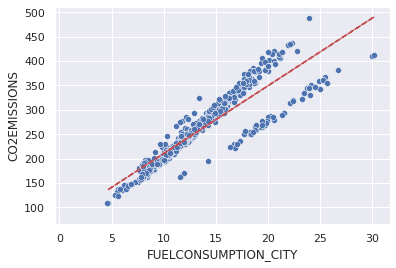

In [ ]:
modelo.grafica('FUELCONSUMPTION_CITY','CO2EMISSIONS')

<p><a name="skl"></a></p>

# **Introducción a Sklearn (Sci-kit Learn)**

[Sklearn](https://scikit-learn.org/stable/index.html) nos proporciona una colección de clases y funciones relacionadas con ML que podemos importar en nuestros programas. Entre otras cosas, incluye algoritmos de ML clásicos, herramientas para la evaluación de modelos, así como elementos para el preprocesamiento de los datos.

Todos los objetos dentro de scikit-learn comparten una API básica que consta de tres interfaces complementarias: una interfaz de estimador para construir y ajustar modelos, una interfaz de predicción y una interfaz de transformación para los datos. 


















**Estimador**

La interfaz del estimador es el núcleo de la libreria. Define los mecanismos para la creación de los objetos. Todos los algoritmos de aprendizaje supervisado ​​y no supervisado se presentan como objetos que implementan esta interfaz. 

Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama estimador. Por ejemplo, el objeto `LinearRegression`, nos permite obtener un modelo de regresion lineal (estimar los parámetros $W$), es un ejemplo de estimador.

In [ ]:
from sklearn.linear_model import LinearRegression

LinearRegression?

Ahora, La inicialización del estimador y el entrenamiento realmente están estrictamente separados. Inicialicemos el estimador:

In [ ]:
model = LinearRegression()

In [ ]:
help(model)

Ahora en este punto debemos diferenciar dos elementos del proceso: Los parametros y los hiperparametros.

* **Parámetros:** Son aquellos parámetros que pertenecen al modelo y que se utilizan en el entrenamiendo, que como vimos es simplemente el proceso de optimización de estos parámetros respecto a alguna función de pérdida que se defina.

* **Hiperparámetros:** Son parametros del algoritmo y no del modelo como tal. Estos son parametros que se deben definir previo al proceso de entrenamiento y que permanecerán constantes durante este proceso.


Un estimador se inicializa a partir de un conjunto de hiperparámetros constantes. Podemos considerar el estimador como una función que asigna estos hiperparámetros a los algoritmos de aprendizaje.

Noten que el constructor de un estimador no utiliza ningún dato como tal, ni realiza ningún aprendizaje real. Todo lo que hace es proporcionar los hiperparámetros especificados al objeto.

El aprendizaje real se realiza mediante el método `fit`. Este método toma como argumentos los datos de entrenamiento

In [ ]:
X = df[["FUELCONSUMPTION_CITY"]]
y = df.CO2EMISSIONS

El método `fit` se encarga de ejecutar un algoritmo de aprendizaje y determinar los parámetros específicos del modelo a partir de los datos de entrenamiento y establecer estos parámetros como atributos del objeto




In [ ]:
model.fit(X,y);

In [ ]:
print(f"Cesgo (w_0): {model.intercept_}")
print(f"Pendiente (w_1): {model.coef_}")

Cesgo (w_0): 71.72022839690194
Pendiente (w_1): [13.87643376]


En scikit-learn, los algoritmos de aprendizaje clásicos no son los únicos objetos que se implementan como estimadores. Por ejemplo, las rutinas de preprocesamiento, que veremos más adelante, también implementan la interfaz del estimador.

**Predictor**

La interfaz del predictor amplía la noción de un estimador al agregar un método de predicción  `predict` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes

In [ ]:
model.predict(np.array([[12]]))

array([238.23743349])

Ahora, Además de `predict`, los predictores también pueden implementar algunos métodos que cuantifican la confianza de las predicciones más que la prediccion como tal. Por ejemplo, si tenemos como salida un clase binaria o múltiple, en muchos casos más que saber la predicción del modelo, vamos a querer saber cuál es la probabilidad de que la salida pertenezca a una clase u otra. 

Los predictores También tiene un método `score` que mide la calidad de las predicciones dado un conjunto de prueba. Esto lo veremos de mejor manera cuando estudiemos las métricas para la evaluación de los modelos.


**Transformadores**

Dado que es muy común modificar o filtrar los datos antes de usarlos para alimentar un algoritmo de ML, algunos estimadores en la librería implementan una interfaz de transformador. la transformación se realiza mediante el método `transform`, que toma algunos datos y produce como salida una versión transformada de estos. 

Por ejemplo, Los algoritmos de preprocesamiento, selección de características, extracción de características y reducción de dimensionalidad se proporcionan como transformadores dentro de la libreria.

Los transformadores también tienen un método conveniente llamado `fit_transform` que es equivalente a llamar a `fit` y luego aplicar `transform`.







Con estos elementos en principio deberíamos tener claro la correspondencia entre los conceptos y elementos del ML y la forma en que sklearn asigna estos conceptos y elementos a los objetos de Python y sus funcionalidades.